# Tools for Analyzing Time Series of Satellite Imagery (TATSSI)

In [3]:
# Import TATSSI libraries
from helpers import utils
from TATSSI.notebooks.helpers.time_series_analysis import TimeSeriesAnalysis

## Time series analysis
For an interpolated or smoothed time series TATSSI allows the following time series (TS) analysis functions
* Decomposition
  * Computes the trend, seasonality and residuals using a simple multiplicative or additive models
* Multiple change point detections using the [changepoint](http://members.cbio.mines-paristech.fr/~thocking/change-tutorial/RK-CptWorkshop.html) package. The ```cpt.meanvar``` method has been used to capture potential changes in mean and variance. The detrended time series has been used to identify the change points.
* Climatology
  * Computes for every time step (within a calendar year) for all years in the TS:
    * The Q1, Q3, IQR, upper and lower limits, and the outliers
    * The mean and standard deviation
    
    <img src="helpers/BoxPlot_PDFs.png" alt="Drawing" align="left" style="width: 400px;"/>


<IPython.core.display.Javascript object>


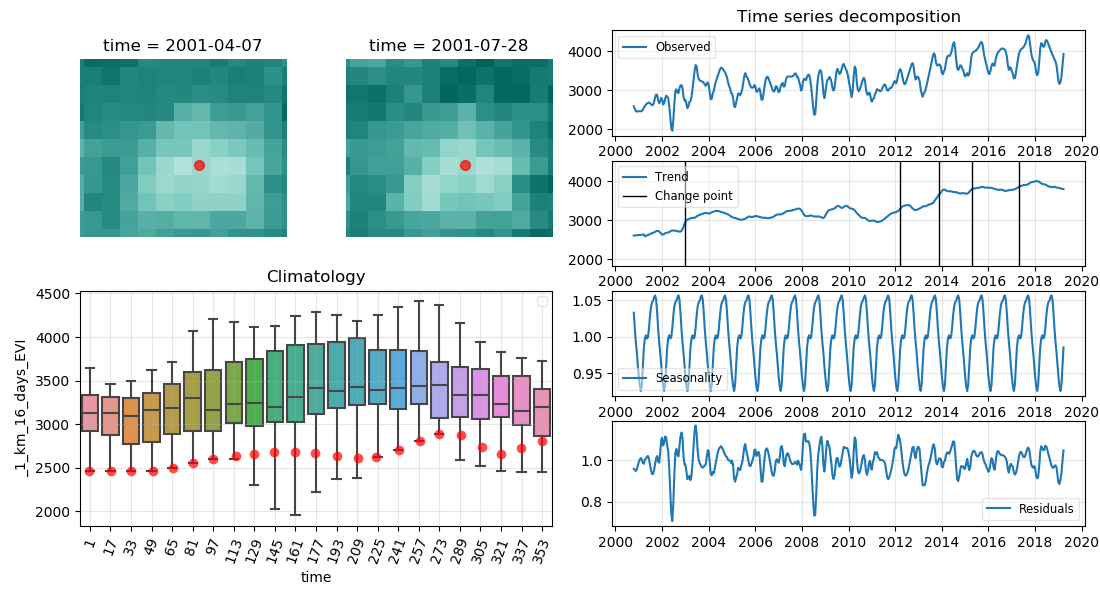

In [37]:
# Time series analysis object
#fname = '/home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/interpolated/MOD13A2.006._1_km_16_days_NDVI.linear.tif'
#fname = '/home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/interpolated/MOD13A2.006._1_km_16_days_EVI.linear.tif'
tsa = None
fname = '/home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/interpolated/MOD13A2.006._1_km_16_days_EVI.linear.smoothn.tif'
tsa = TimeSeriesAnalysis(fname=fname, cmap='BrBG')

In [ ]:
tsa.debug_view

In [5]:
# Compute climatology
tsa.get_climatology()


[########################################] | 100% Completed | 12.8s
[########################################] | 100% Completed | 13.3s


In [31]:
# Get anomalies for DoY 177
year = 2015

# Get EVI for doy and year
time_slice = slice(f"{year}-01-01", f"{year}-12-31")

observations = tsa.ts.data._1_km_16_days_EVI.sel(time=time_slice)

# Anomalies
anomalies = observations - tsa.ts.climatology_mean.data
%time anomalies = anomalies.compute()

CPU times: user 2.22 s, sys: 156 ms, total: 2.37 s
Wall time: 2.23 s


<IPython.core.display.Javascript object>


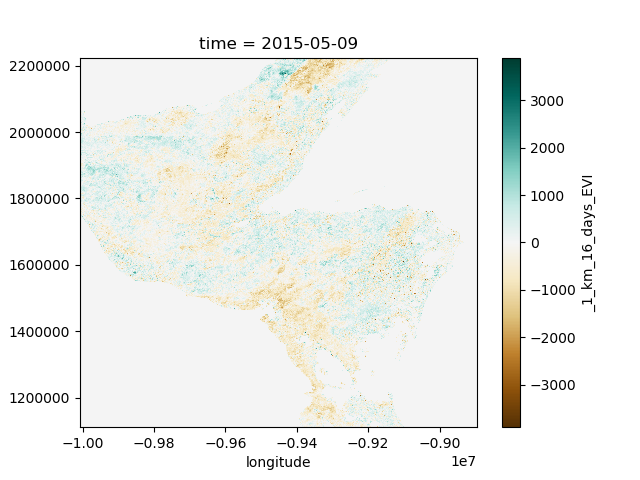

In [35]:
import matplotlib.pyplot as plt

anomalies.sel(time=f'{year}-05-01', method='nearest').plot.imshow(cmap='BrBG')
plt.show()